In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
from tqdm.notebook import trange as tnrange

In [3]:
import IPython.display
import librosa
import librosa.display

In [4]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join('..')))

from util.visualization import *
from util.preprocessing import *
from util.evaluation import *
from following_motif_relation.compared_method import *
from following_motif_relation.followingMotif import *
from dataset.syntheticDataset import *

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



# Real Data 1 : Lost Star Vocal Singings 

## loading data

In [5]:
#path = r"./python/dataset/realdata_vocal"
path = r"C:/Users/Hugh/Documents/workspace/2024/SAI_research/Following Motif Relation/python/dataset/realdata_vocal"

y_adam_11025 = np.load(f'{path}/y_adam_11025.npy')
y_matt_11025 = np.load(f'{path}/y_matt_11025.npy')

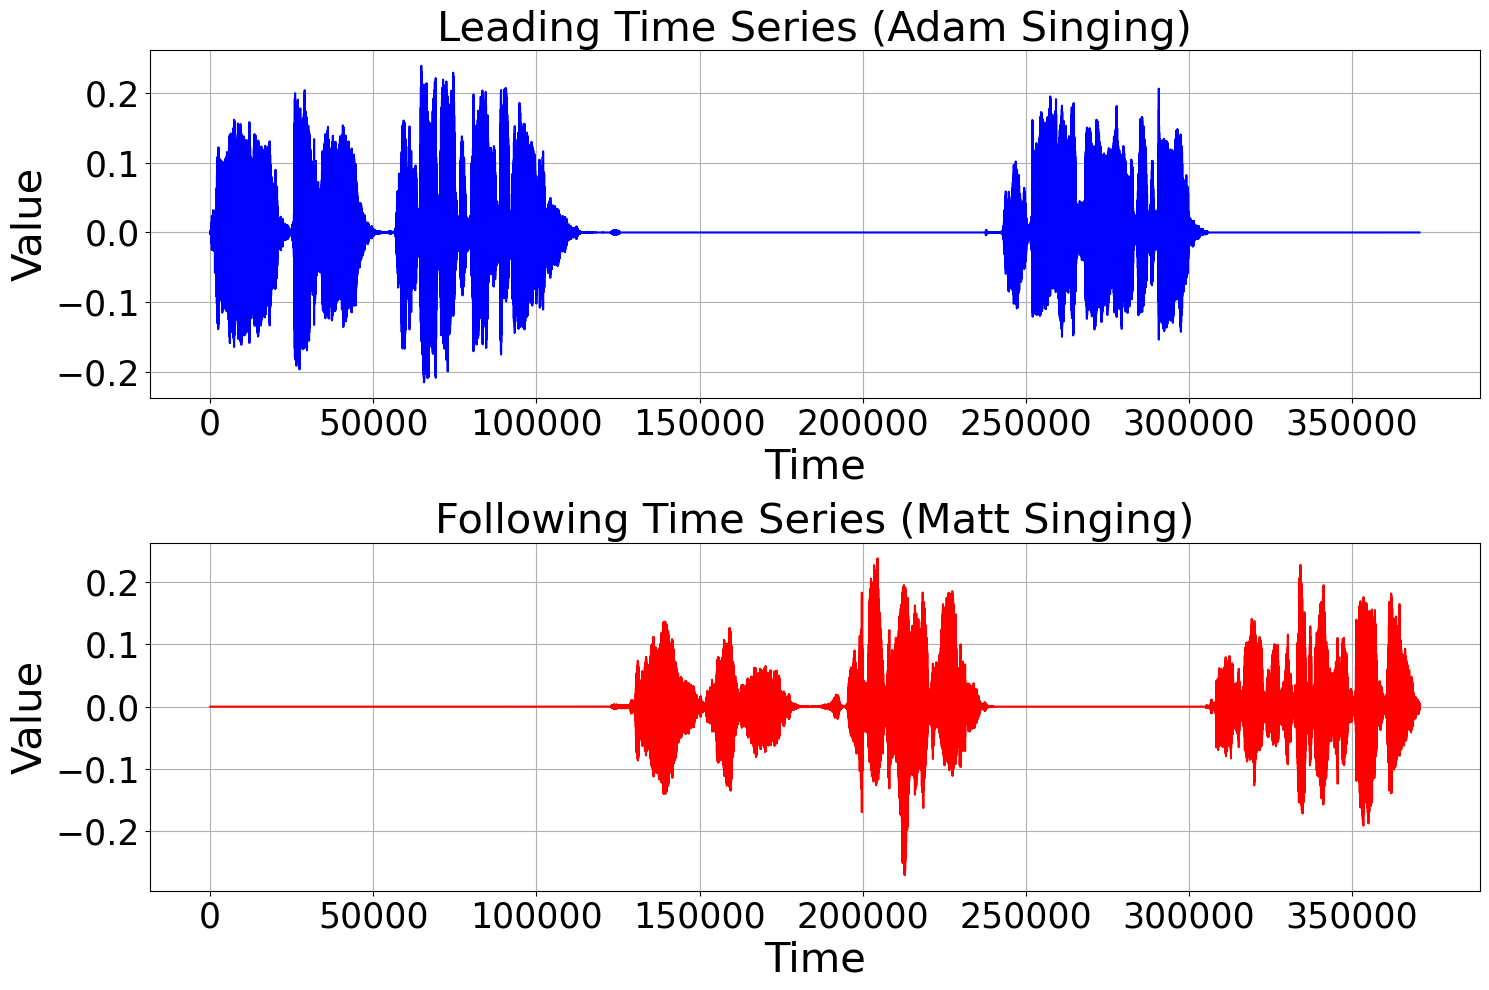

In [6]:
leadfollow_visualization(y_adam_11025,y_matt_11025)

## Adam and Matt sampling down and no noise test  

In [7]:
sample_y_adam   = y_adam_11025.copy()
sample_y_matt   = y_matt_11025.copy()

sampled_y_adam   = sample_down(sample_y_adam,size=0.05).copy()
sampled_y_matt   = sample_down(sample_y_matt,size=0.05).copy()

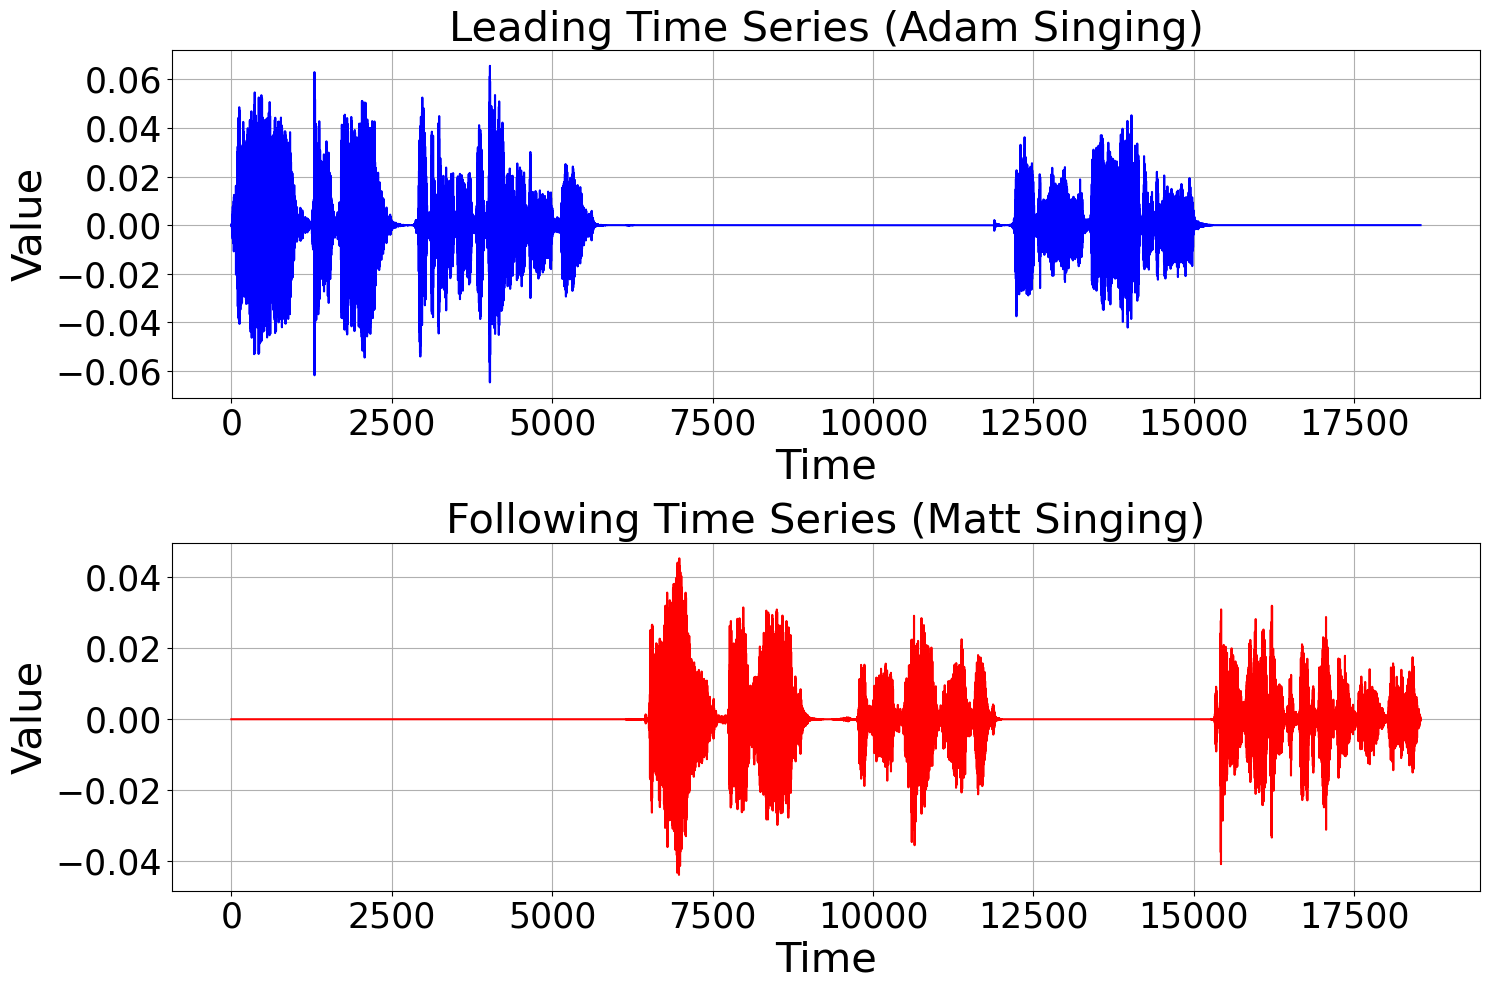

In [8]:
leadfollow_visualization(sampled_y_adam,sampled_y_matt)

## labeling the vocal data

Adam : "Please, don't see, Just a boy caught up in dreams and fantasies"

Matt : "Please, see me, Reaching out for someone I can't see"

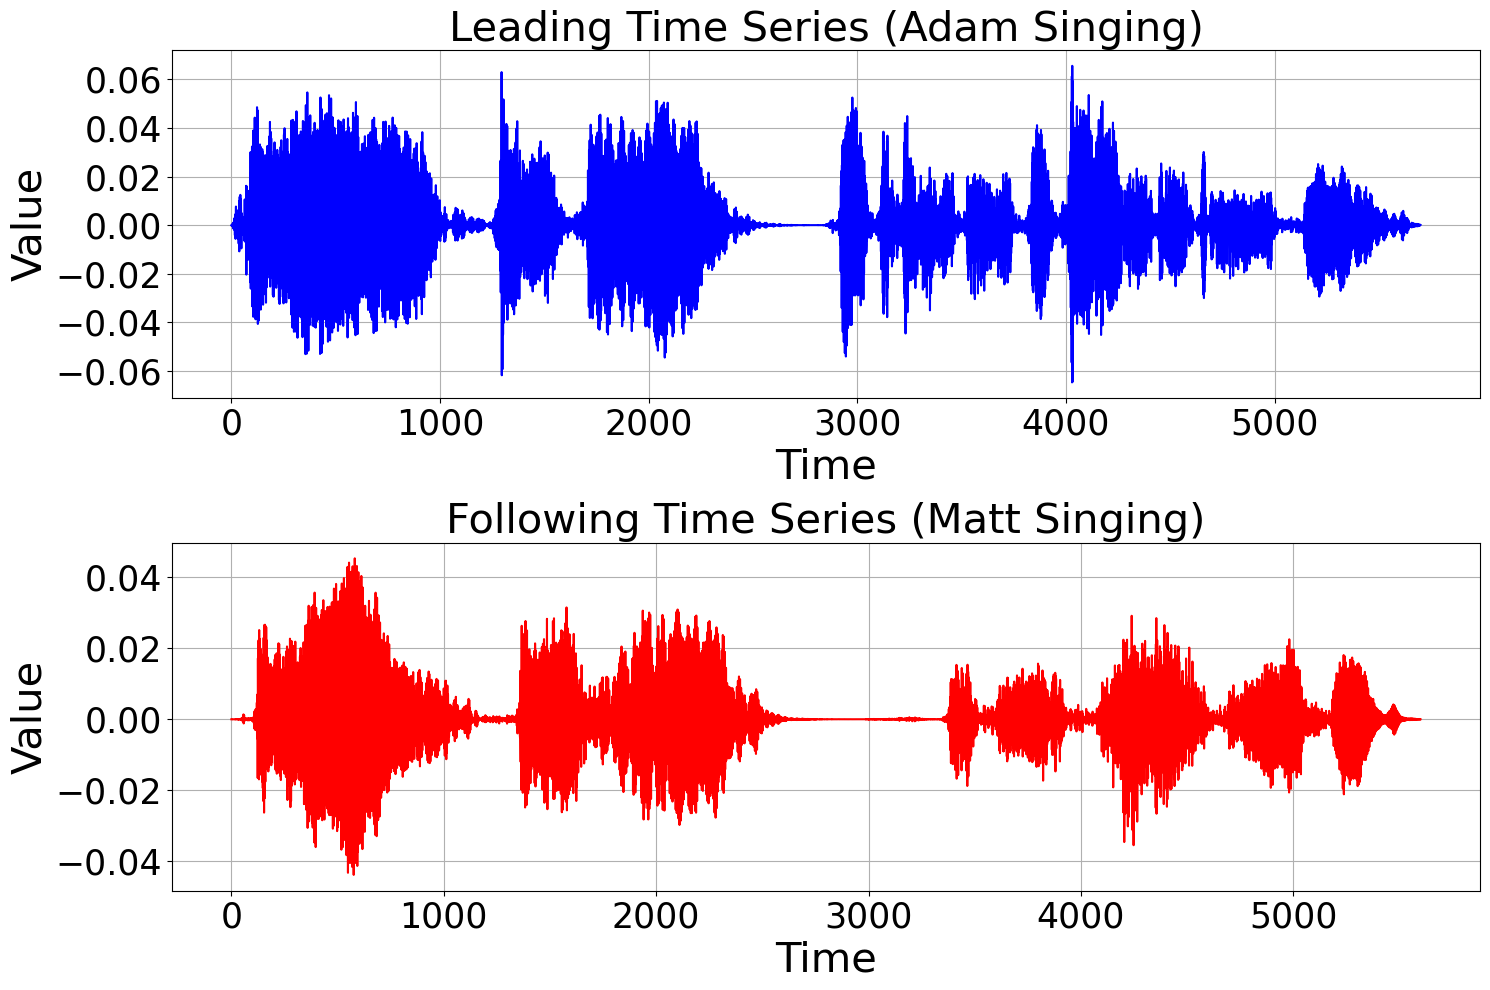

In [9]:
leadfollow_visualization(sampled_y_adam[0:5700],sampled_y_matt[6400:12000])

Adam : "Take my hand
Let's see where we wake up tomorrow"

Matt : "Best laid plans
Sometimes are just a one night stand"

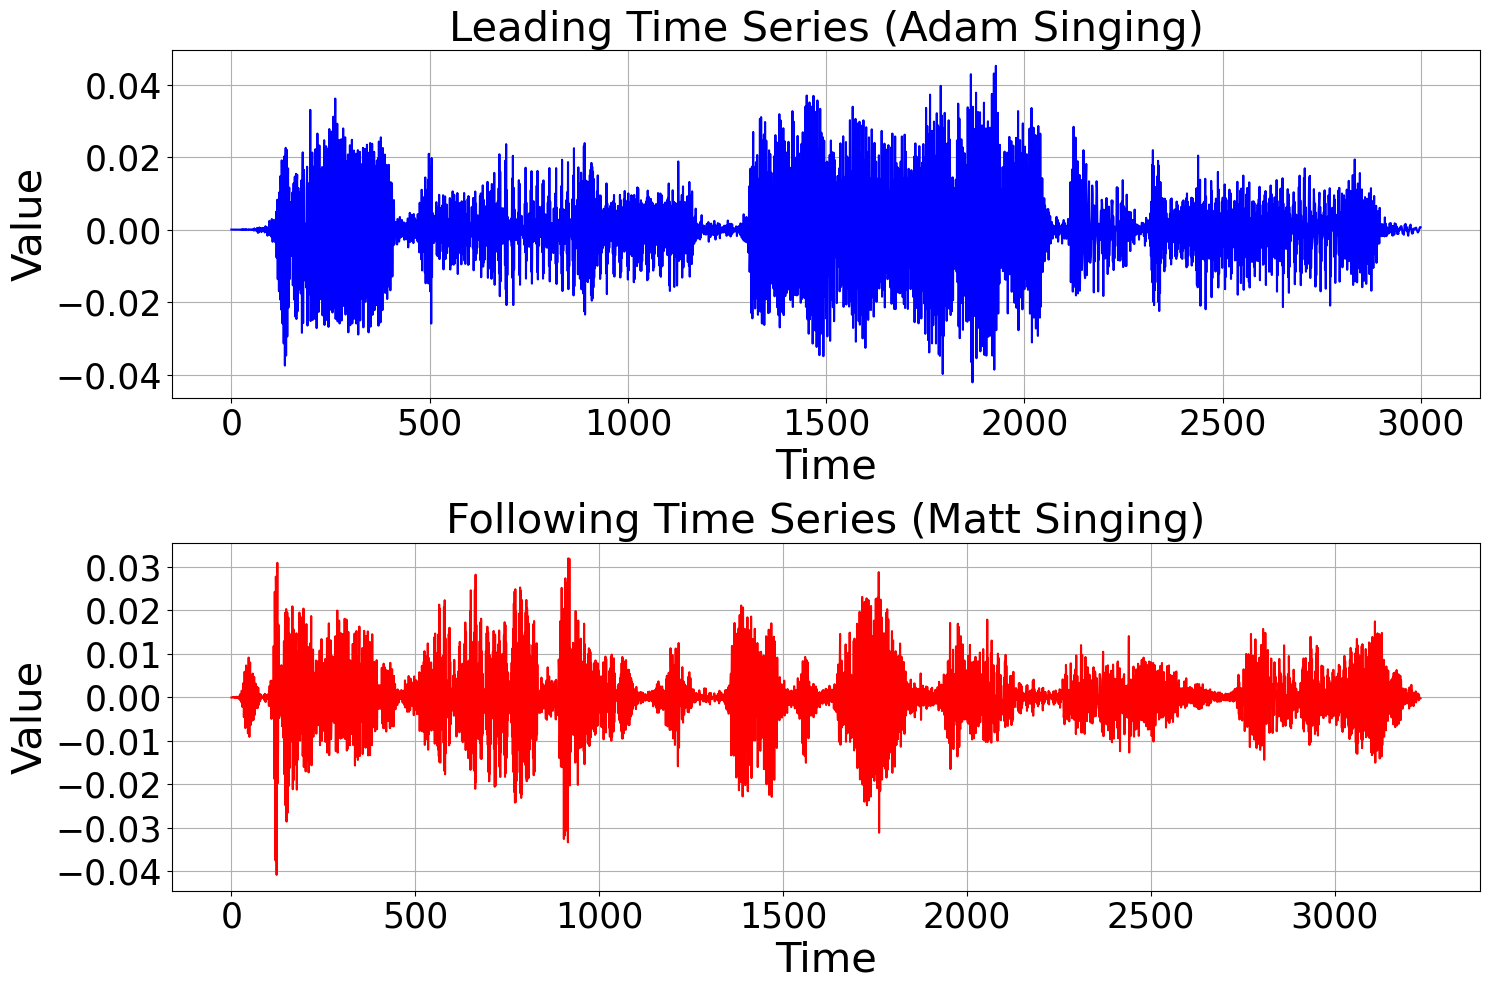

In [10]:
leadfollow_visualization(sampled_y_adam[12100:15100],sampled_y_matt[15300:])

## Experiment : Following Motif Method’s performance for determining which time series leads and inferring following motif time steps with real vocal time series, added different degrees of noise.

In [11]:
np.random.seed(0)

leading_signal = [sampled_y_adam,
                   [[0,12100],[5700,15100]]
                ]
following_signal = [sampled_y_matt,
                   [[6400,15300],[12000,len(sampled_y_matt)-1]]
                ]

true_false = evaluate_a_pair_ts(leading_signal,following_signal,wd=700,thres=10,randseed=0,verbose=True)

data = [
    calculate_matrix(true_false[0],true_false[1],true_false[2],true_false[3])
]

# Create DataFrame
df = pd.DataFrame(data, columns=['TP', 'TN', 'FP', 'FN','Precision','Recall','F1','Accuracy'])
df.index = ["Dataset"]
df

leadVol: 0.168098986056419


,TP,TN,FP,FN,Precision,Recall,F1,Accuracy
Dataset,11887,6750,1084,1897,0.916429,0.862377,0.888582,0.862106


In [12]:
np.random.seed(0)

noised_sample_y_adam   = sampled_y_adam.copy()
noised_sample_y_matt   = sampled_y_matt.copy()

noise_round = 1
noise_size  = 0.000

for j in range(int(noise_round)):
    noised_sample_y_adam  += np.random.normal(0, noise_size, len(noised_sample_y_adam))
    noised_sample_y_matt  += np.random.normal(0, noise_size, len(noised_sample_y_matt))

leading_signal   = noised_sample_y_adam.copy()
following_signal = noised_sample_y_matt.copy()

#================================================================================

leading_signal = [leading_signal,
                   [[0,12100],[5700,15100]]
                ]
following_signal = [following_signal,
                    [[6400,15300],[12000,len(following_signal)]]
                  ]

true_false = evaluate_a_pair_ts(leading_signal,following_signal,wd=700,thres=10,randseed=0,verbose=True)

data = [
      calculate_matrix(true_false[0],true_false[1],true_false[2],true_false[3])
]

df = pd.DataFrame(data, columns=['TP', 'TN', 'FP', 'FN','Precision','Recall','F1','Accuracy'])
df.index = [fr"{noise_size}"]
df

leadVol: 0.168098986056419


,TP,TN,FP,FN,Precision,Recall,F1,Accuracy
0.0,11887,6750,1084,1897,0.916429,0.862377,0.888582,0.862106


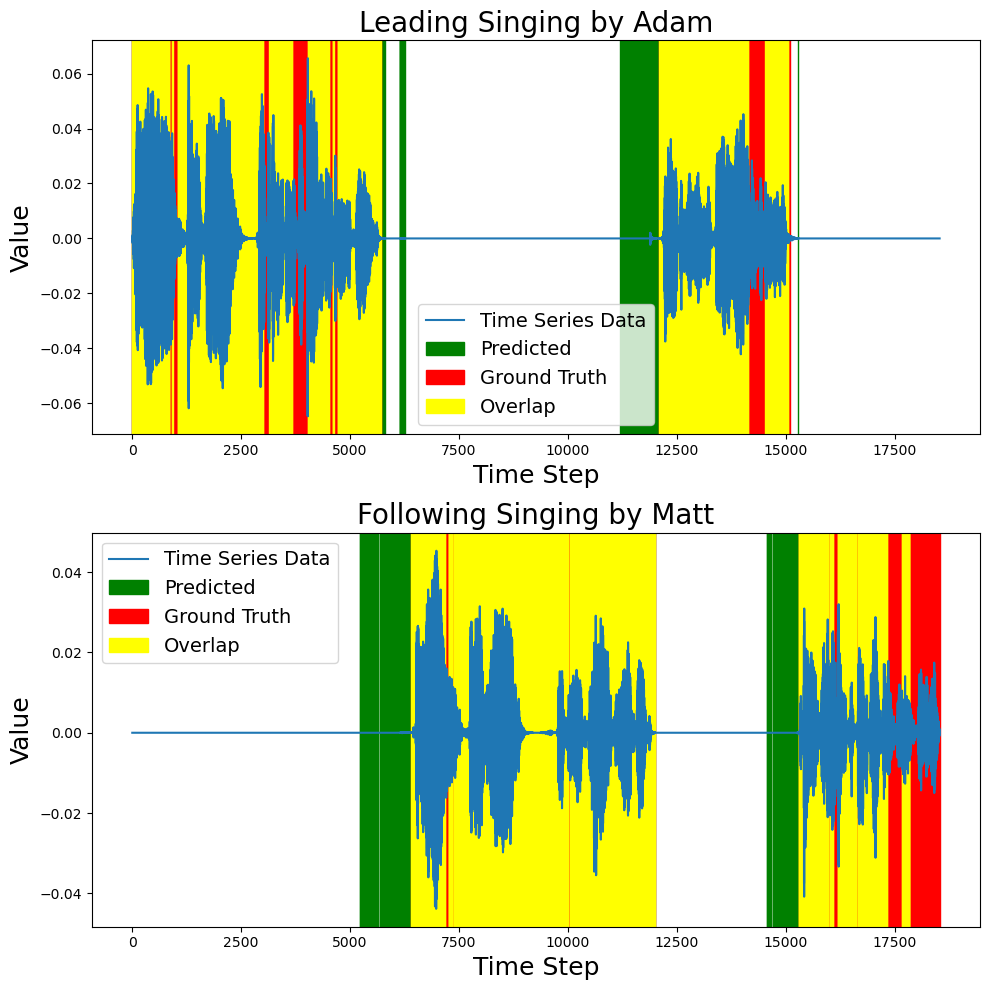

In [13]:
np.random.seed(0)

leading_signal   = noised_sample_y_adam.copy()
following_signal = noised_sample_y_matt.copy()

result = following_motif_method(leading_signal,following_signal,wd=700,thres=10,randseed=0)

ts1 = create_timeseries_from_array(leading_signal)
ts2 = create_timeseries_from_array(following_signal)

fig, axs = plt.subplots(2, 1, figsize=(10, 10))

leading_signal = [leading_signal,
                   [[0,12100],[5700,15100]]
                ]
following_signal = [following_signal,
                    [[6400,15300],[12000,len(following_signal)-1]]
                  ]

plot_time_series_with_highlights(ts1, result[2][1], axs[0],"Leading Singing by Adam",
                                   ground_truth_indices=ground_truth(leading_signal))
plot_time_series_with_highlights(ts2, result[2][0], axs[1],"Following Singing by Matt",
                                   ground_truth_indices=ground_truth(following_signal))

plt.tight_layout()
plt.show()

In [14]:
np.random.seed(0)

noised_sample_y_adam   = sampled_y_adam.copy()
noised_sample_y_matt   = sampled_y_matt.copy()

noise_round = 1
noise_size  = 0.001

for j in range(int(noise_round)):
    noised_sample_y_adam  += np.random.normal(0, noise_size, len(noised_sample_y_adam))
    noised_sample_y_matt  += np.random.normal(0, noise_size, len(noised_sample_y_matt))

leading_signal   = noised_sample_y_adam.copy()
following_signal = noised_sample_y_matt.copy()

#================================================================================

leading_signal = [leading_signal,
                   [[0,12100],[5700,15100]]
                ]
following_signal = [following_signal,
                    [[6400,15300],[12000,len(following_signal)]]
                  ]

true_false = evaluate_a_pair_ts(leading_signal,following_signal,wd=700,thres=10,randseed=0,verbose=True)

data = [
      calculate_matrix(true_false[0],true_false[1],true_false[2],true_false[3])
]

df = pd.DataFrame(data, columns=['TP', 'TN', 'FP', 'FN','Precision','Recall','F1','Accuracy'])
df.index = [fr"{noise_size}"]
df

leadVol: 0.21470378918864158


,TP,TN,FP,FN,Precision,Recall,F1,Accuracy
0.001,12703,7307,527,1549,0.960166,0.891313,0.92446,0.906004


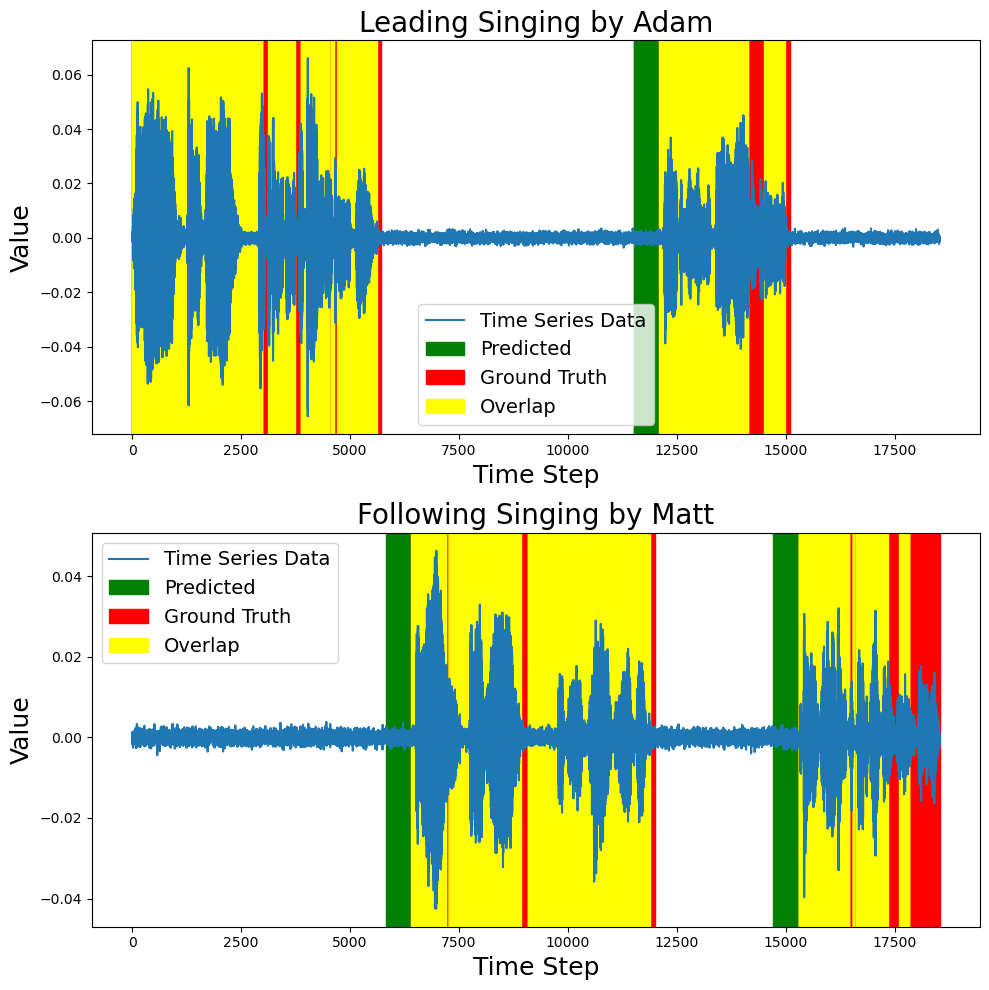

In [15]:
np.random.seed(0)

leading_signal   = noised_sample_y_adam.copy()
following_signal = noised_sample_y_matt.copy()

result = following_motif_method(leading_signal,following_signal,wd=700,thres=10,randseed=0)

ts1 = create_timeseries_from_array(leading_signal)
ts2 = create_timeseries_from_array(following_signal)

fig, axs = plt.subplots(2, 1, figsize=(10, 10))

leading_signal = [leading_signal,
                   [[0,12100],[5700,15100]]
                ]
following_signal = [following_signal,
                    [[6400,15300],[12000,len(following_signal)-1]]
                  ]

plot_time_series_with_highlights(ts1, result[2][1], axs[0],"Leading Singing by Adam",
                                   ground_truth_indices=ground_truth(leading_signal))
plot_time_series_with_highlights(ts2, result[2][0], axs[1],"Following Singing by Matt",
                                   ground_truth_indices=ground_truth(following_signal))

plt.tight_layout()
plt.show()

In [16]:
np.random.seed(0)

noised_sample_y_adam   = sampled_y_adam.copy()
noised_sample_y_matt   = sampled_y_matt.copy()

noise_round = 1
noise_size  = 0.005

for j in range(int(noise_round)):
    noised_sample_y_adam  += np.random.normal(0, noise_size, len(noised_sample_y_adam))
    noised_sample_y_matt  += np.random.normal(0, noise_size, len(noised_sample_y_matt))

leading_signal   = noised_sample_y_adam.copy()
following_signal = noised_sample_y_matt.copy()

#================================================================================

leading_signal = [leading_signal,
                   [[0,12100],[5700,15100]]
                ]
following_signal = [following_signal,
                    [[6400,15300],[12000,len(following_signal)]]
                  ]

true_false = evaluate_a_pair_ts(leading_signal,following_signal,wd=700,thres=10,randseed=0,verbose=True)

data = [
      calculate_matrix(true_false[0],true_false[1],true_false[2],true_false[3])
]

df = pd.DataFrame(data, columns=['TP', 'TN', 'FP', 'FN','Precision','Recall','F1','Accuracy'])
df.index = [fr"{noise_size}"]
df

leadVol: 0.23479251642375765


,TP,TN,FP,FN,Precision,Recall,F1,Accuracy
0.005,12718,7326,508,1448,0.961591,0.897783,0.928592,0.911091


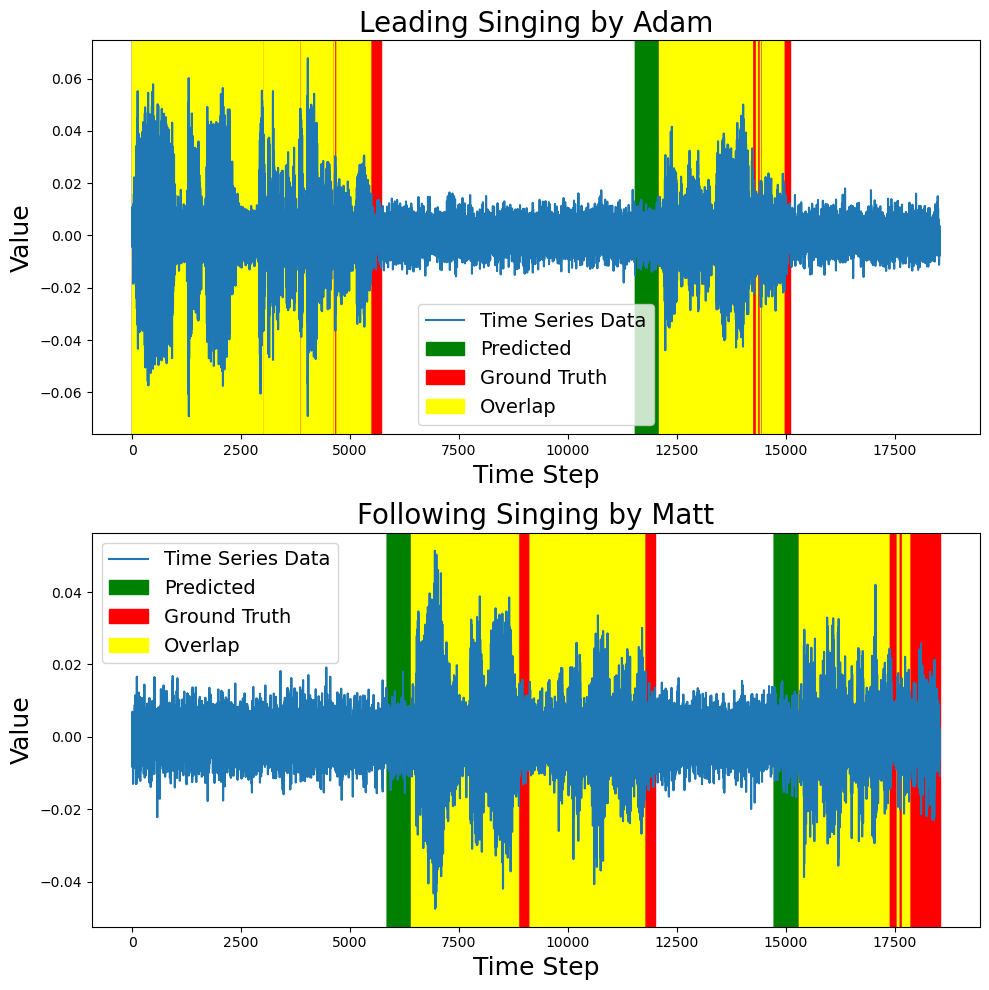

In [17]:
np.random.seed(0)

leading_signal   = noised_sample_y_adam.copy()
following_signal = noised_sample_y_matt.copy()

result = following_motif_method(leading_signal,following_signal,wd=700,thres=10,randseed=0)

ts1 = create_timeseries_from_array(leading_signal)
ts2 = create_timeseries_from_array(following_signal)

fig, axs = plt.subplots(2, 1, figsize=(10, 10))

leading_signal = [leading_signal,
                   [[0,12100],[5700,15100]]
                ]
following_signal = [following_signal,
                    [[6400,15300],[12000,len(following_signal)-1]]
                  ]

plot_time_series_with_highlights(ts1, result[2][1], axs[0],"Leading Singing by Adam",
                                   ground_truth_indices=ground_truth(leading_signal))
plot_time_series_with_highlights(ts2, result[2][0], axs[1],"Following Singing by Matt",
                                   ground_truth_indices=ground_truth(following_signal))

plt.tight_layout()
plt.show()

# Real Data 2 : CryptoCurrency

In [18]:
path = r"C:/Users/Hugh/Documents/workspace/2024/SAI_research/Following Motif Relation/python/dataset/realdata_cryptocurrency"

BTC_signal = np.load(f'{path}/leading_signal.npy')
ETH_signal = np.load(f'{path}/following_signal.npy')

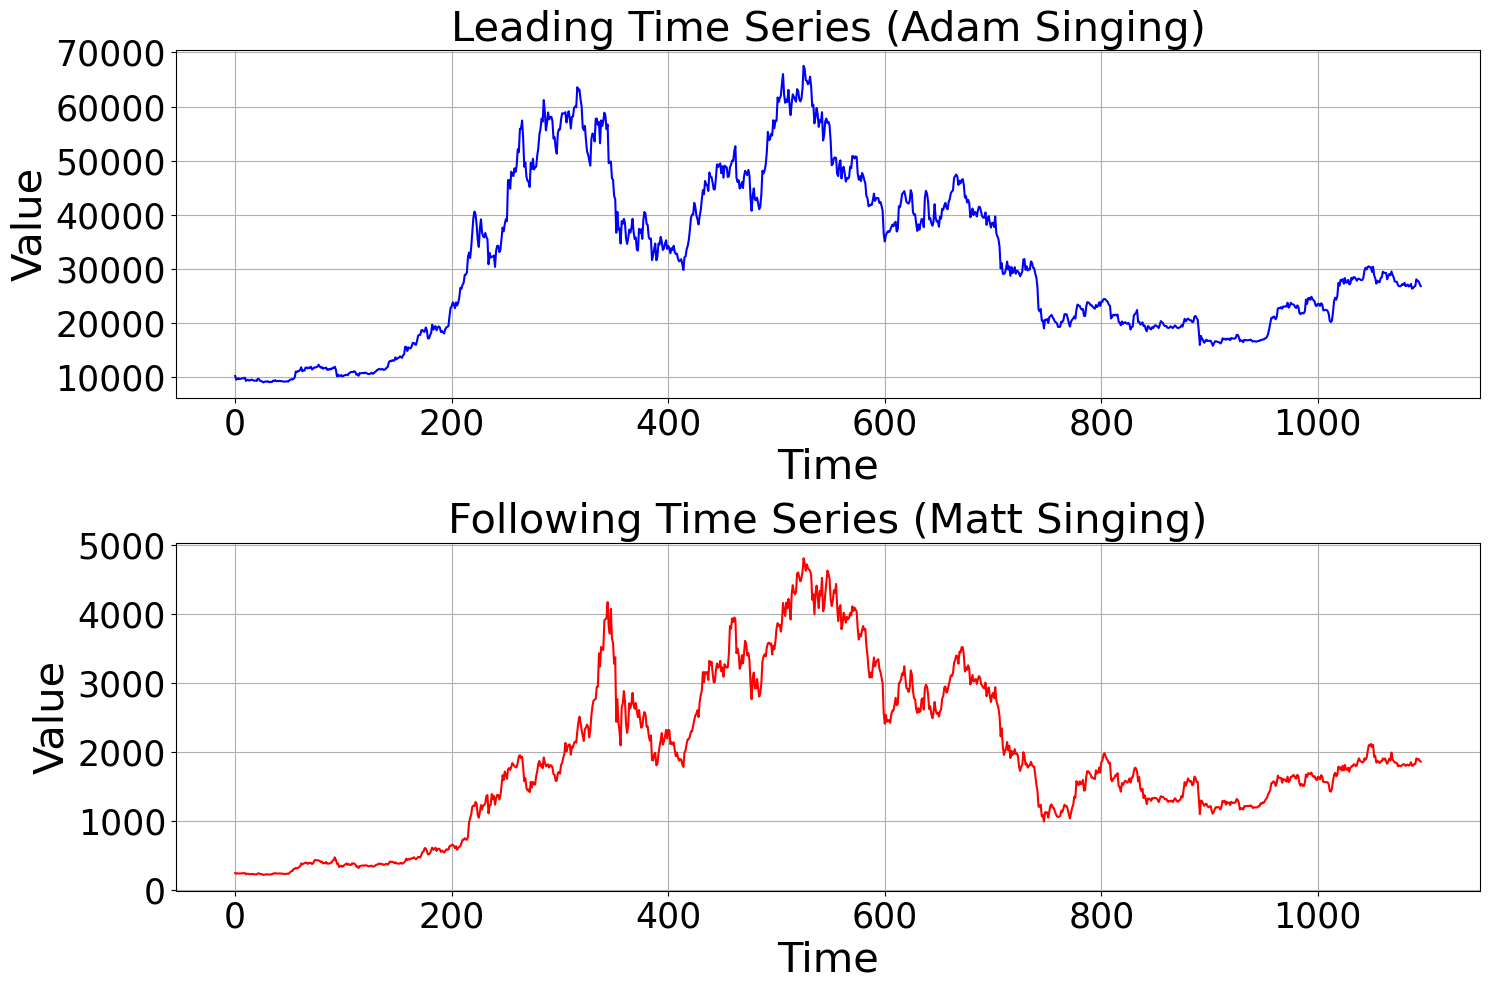

In [19]:
leadfollow_visualization(BTC_signal,ETH_signal)

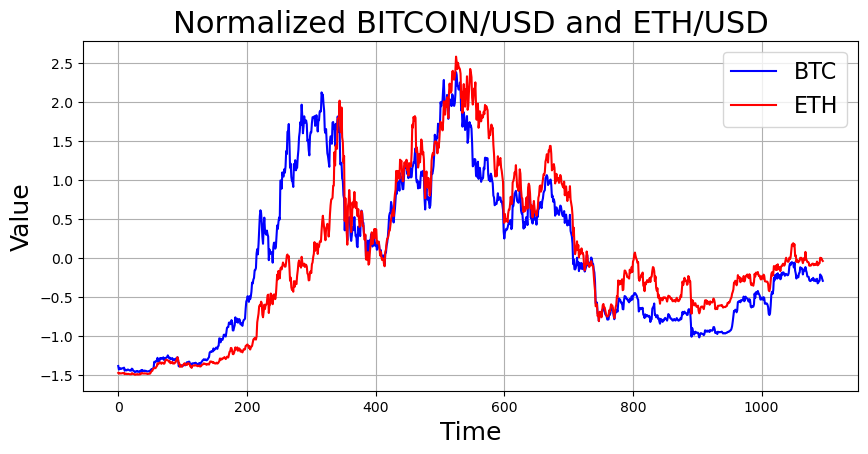

In [20]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.title('Normalized BITCOIN/USD and ETH/USD', fontsize=22)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Value', fontsize=18)
plt.grid()
plt.plot(zNormalize(BTC_signal), label='BTC', color='blue')
plt.plot(zNormalize(ETH_signal), label='ETH', color='red')
plt.legend(fontsize=16)

plt.show()

Groundtruth: Bitcoin leads Ether throughout the price trend 

## Experiment: Does Bitcoin leads Ether?

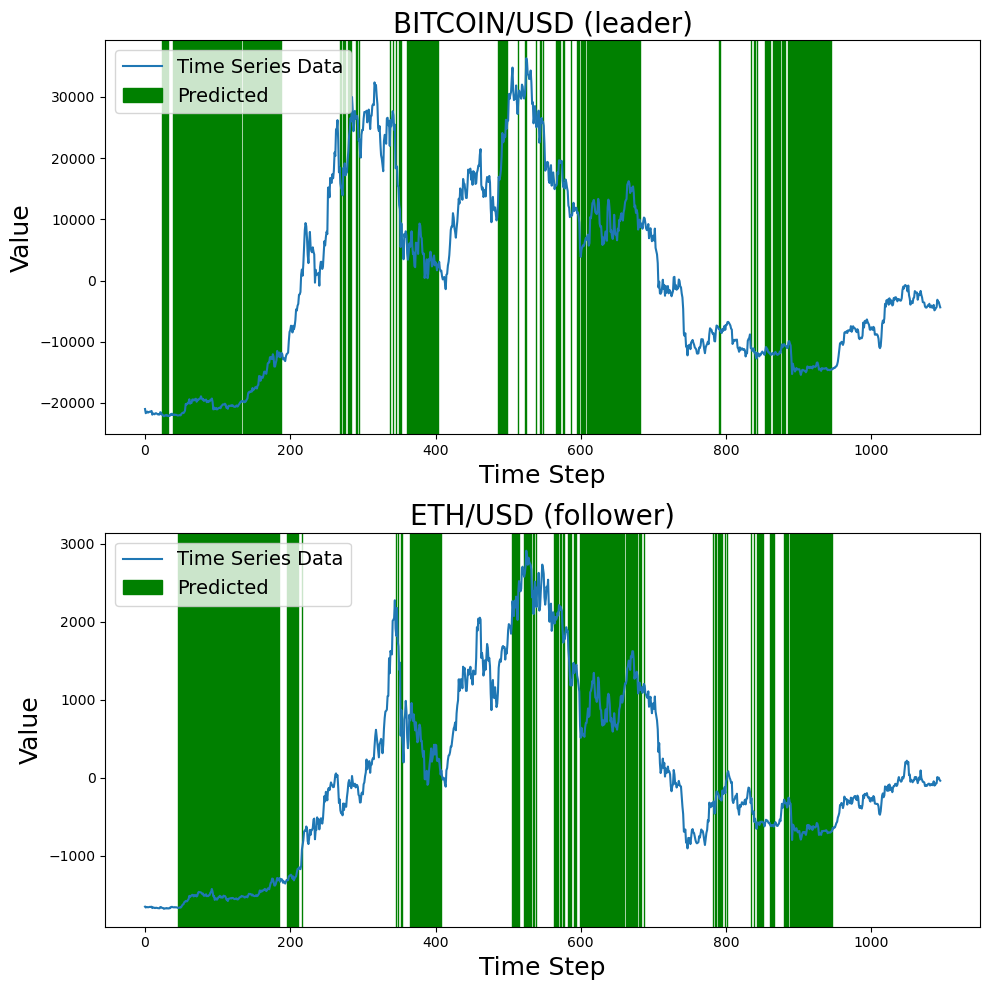

In [21]:
np.random.seed(0)
result = following_motif_method(BTC_signal,ETH_signal,wd=150,thres=5,randseed=0)

ts1 = create_timeseries_from_array(BTC_signal)
ts2 = create_timeseries_from_array(ETH_signal)

fig, axs = plt.subplots(2, 1, figsize=(10, 10))

plot_time_series_with_highlights(ts1, result[2][1], axs[0],"BITCOIN/USD (leader)")
plot_time_series_with_highlights(ts2, result[2][0], axs[1],"ETH/USD (follower)")

plt.tight_layout()
plt.show()

Answer of Bitcoin leads Ether 

In [22]:
result[0]

True

LeadVoll of Bitcoin leads Ether 

In [23]:
result[1]

0.019837787726004034

In [24]:
np.random.seed(0)
result1 = following_motif_method(ETH_signal,BTC_signal,wd=150,thres=5,randseed=0)
result1[0]

False

In [25]:
result1[1]

-0.03983173946884404

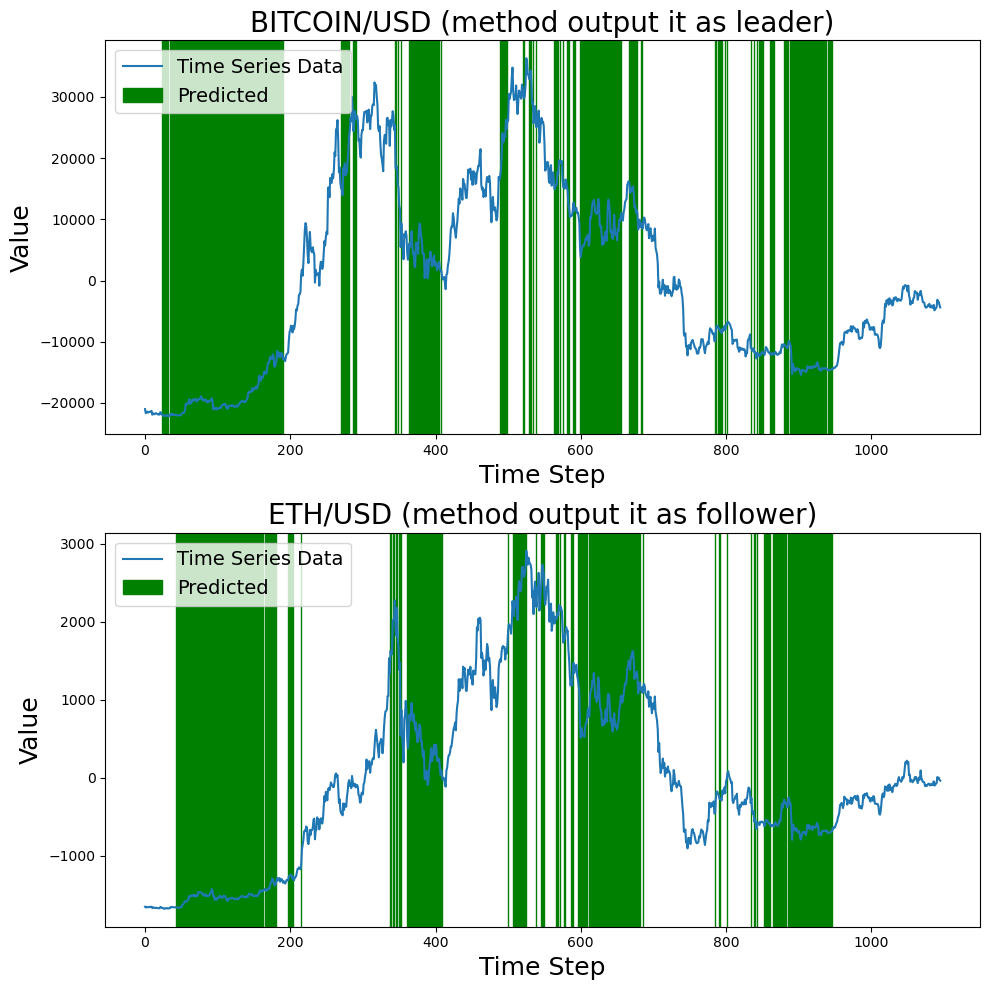

In [26]:
ts1 = create_timeseries_from_array(ETH_signal)
ts2 = create_timeseries_from_array(BTC_signal)

fig, axs = plt.subplots(2, 1, figsize=(10, 10))

plot_time_series_with_highlights(ts2, result1[2][0], axs[0],"BITCOIN/USD (method output it as leader)")
plot_time_series_with_highlights(ts1, result1[2][1], axs[1],"ETH/USD (method output it as follower)")

plt.tight_layout()
plt.show()

In [27]:
result1[2][1]==result[2][1]

False

In [28]:
result1[2][0]==result[2][0]

False

In [29]:
result[2][0]==result[2][0]

True

## Alignment of following Motif Relation time steps (Cryptocurrency data) 

Standard Length: 426


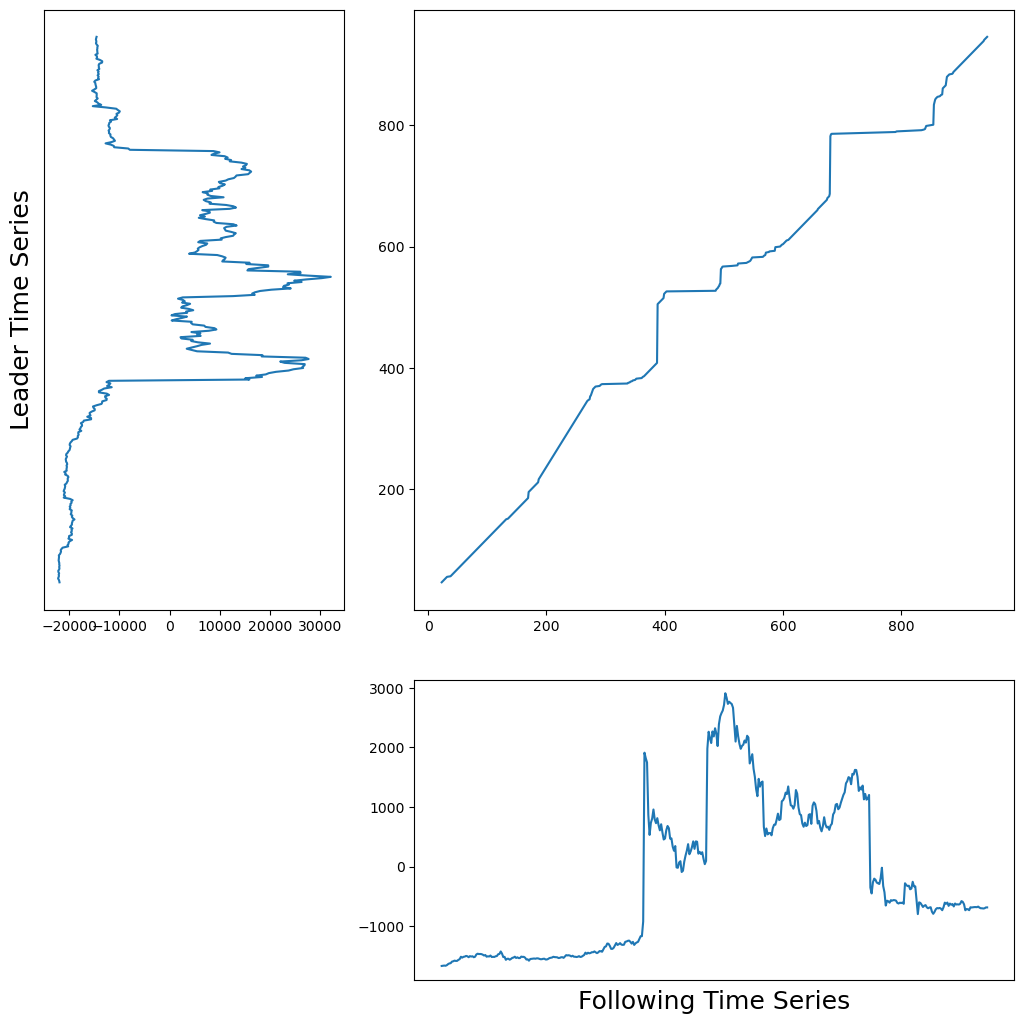

In [30]:
alignment_plot(BTC_signal,ETH_signal,result)